In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import scipy.special as sp
import os 
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/sf.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize'] 
style_file = plot_style['aps']
plt.rcParams['text.usetex']=False

In [2]:
filenames=os.listdir('../data/ed')
filenamesdmrg = os.listdir('../data/dmrg')

In [3]:
filenames.remove('.ipynb_checkpoints')
filenamesdmrg.remove('.ipynb_checkpoints')

In [4]:
def loaddata(α,v):
    nN=[]
    N=[]
    ent=[] 
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                nN.append(n/Nval)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                ratio = n/Nval
                nN.append(ratio)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    return N, nN, ent

In [20]:
def scatterplotdiffa(N, nN, ent,color):
    ratiosed = []
    entangNed =[]
    ratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                ratiosed.append(nN[i])
                ratiosed.append(1-nN[i])
                entangNed.append(ent[i]/N[i])
                entangNed.append(ent[i]/N[i])
            else:
                ratiosdmrg.append(nN[i])
                ratiosdmrg.append(1-nN[i])
                entangNdmrg.append(ent[i]/N[i])
                entangNdmrg.append(ent[i]/N[i])
    plt.scatter(ratiosed,entangNed,s=1,marker='D',color=color,label=rf'$\alpha={α}$')
    plt.scatter(ratiosdmrg,entangNdmrg,s=1,marker='D',color=color)

In [41]:
def scatterplotdiffv(N, nN, ent,color,marker):
    ratiosed = []
    entangNed =[]
    ratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                ratiosed.append(nN[i])
                ratiosed.append(1-nN[i])
                entangNed.append(ent[i]/N[i])
                entangNed.append(ent[i]/N[i])
            else:
                ratiosdmrg.append(nN[i])
                ratiosdmrg.append(1-nN[i])
                entangNdmrg.append(ent[i]/N[i])
                entangNdmrg.append(ent[i]/N[i])
    plt.scatter(ratiosed,entangNed,s=2,marker=marker,color=color,label=rf'$V/J={v}$')
    plt.scatter(ratiosdmrg,entangNdmrg,s=2,marker=marker,color=color)

In [7]:
colors=["#7EBCE6","#bdd73c","#1A896F","#0B2456","#E71D36","#FF9F1C",'#A40E4C']

In [8]:
def fitfunc(x,a,b):
    return a*x+b
from scipy.optimize import curve_fit

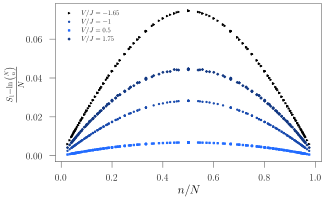

In [45]:
vlist=[-1.65,-1,.5,1.75]
colorsalpha1={-1.65:'#000000',1.75:'#113782',-1:'#1749AD',.5:'#216BFF'}
markers={-1.65:'>',-1:'o',.5:'s',1.75:'D'}
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for α in [1]:
        for v in vlist:
            N,nN,ent=loaddata(α,v)
            scatterplotdiffv(N,nN,ent,colorsalpha1[v],markers[v])
            nval = []
            for j in range(len(nN)):
                nval.append((nN[j]*N[j],N[j]))
        plt.legend(loc="upper center",bbox_to_anchor=(.15,1),fontsize='xx-small')
        plt.xlabel(r'$n/N$')
        plt.ylabel(r'$\frac{S_1-\ln{N \choose n}}{N}$')
        if α==10:
            α=float('inf')
        if α==11:
            α=.5
        plt.savefig('alpha1diffvalln.pdf')
        plt.show()

1.75
1.75
1.75


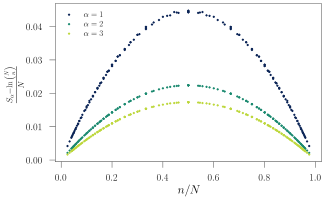

In [27]:
colors=["#0B2456","#1A896F","#bdd73c"]
alphas=[1,2,3]
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for v in [1.75]:
        for i,α in enumerate(alphas):
            N,nN,ent=loaddata(α,v)
            print(v)
            scatterplotdiffa(N,nN,ent,colors[i])
            nval = []
            for j in range(len(nN)):
                nval.append((nN[j]*N[j],N[j]))
        plt.legend(loc="upper center",bbox_to_anchor=(.1,1),fontsize='x-small')
        plt.xlabel(r'$n/N$')
        plt.ylabel(r'$\frac{S_{\alpha}-\ln{N\choose n}}{N}$')
        if α==10:
            α=float('inf')
        if α==11:
            α=.5
        plt.savefig('v1.75diffalpha.pdf')
        plt.show()

In [13]:
def fitfunc(x,a,b):
    return a*x+b
from scipy.optimize import curve_fit

IndexError: list index out of range

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: CMU Serif


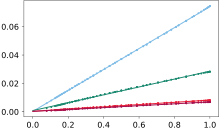

In [14]:
vlist=[-1.65,-1,-.5,.5,1.65,1.75]
for α in [1,2,3]:
    for i,v in enumerate(vlist):
        N,nN,ent=loaddata(α,v)
        scattersindiffv(N,nN,ent,colors[2*i])
    plt.legend(loc="upper center",bbox_to_anchor=(1.5,1.1))
    plt.xlabel(r'$\sin\frac{n\pi}{N}$')
    plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
    if α==10:
        α=float('inf')
    if α==11:
        α=.5
    plt.title(f'α={α}')
    plt.show()

In [ ]:
α=1
newvlist=[-1.75,-1.65,-1,-.5]
for i,v in enumerate(newvlist):
    N,nN,ent=loaddata(α,v)
    scatterplotdiffv(N,nN,ent,colors[3*i+4])
plt.xlabel(r'$\frac{n}{N}$')
plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
plt.plot(ratios,.084*np.sin(ratios*np.pi),color=colors[4],label=r'$.084\sin\frac{n\pi}{N}$')
plt.plot(ratios,.074*np.sin(ratios*np.pi),color=colors[7],label=r'$.074\sin\frac{n\pi}{N}$')
plt.plot(ratios,.028*np.sin(ratios*np.pi),color=colors[10],label=r'$.028\sin\frac{n\pi}{N}$')
plt.plot(ratios,.008*np.sin(ratios*np.pi),color=colors[13],label=r'$.008\sin\frac{n\pi}{N}$')
plt.title('Entanglement corrections fit to sine curves, α=1')
plt.legend(loc="upper center",bbox_to_anchor=(1.2,.9))


In [ ]:
α=5
newvlist=[-1.65,-1]
for i,v in enumerate(newvlist):
    N,nN,ent=loaddata(α,v)
    scatterplotdiffv(N,nN,ent,colors[5*i])
plt.xlabel(r'$\frac{n}{N}$')
plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
plt.plot(ratios,.02*np.sin(ratios*np.pi),color=colors[0],label=r'$.046\sin\frac{n\pi}{N}$')
plt.plot(ratios,.0075*np.sin(ratios*np.pi),color=colors[5],label=r'$.040\sin\frac{n\pi}{N}$')
plt.title('Entanglement corrections fit to sine curves, α=5')
plt.legend(loc="upper center",bbox_to_anchor=(1.2,.9))

In [ ]:
α=11
newvlist=[-1.75,-1]
for i,v in enumerate(newvlist):
    N,nN,ent=loaddata(α,v)
    scatterplotdiffv(N,nN,ent,colors[6*i+4])
plt.xlabel(r'$\frac{n}{N}$')
plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
plt.plot(ratios,.143*np.sin(ratios*np.pi),color=colors[4],label=r'$.143\sin\frac{n\pi}{N}$')
plt.plot(ratios,.074*np.sin(ratios*np.pi),color=colors[10],label=r'$.074\sin\frac{n\pi}{N}$')
plt.title('Entanglement corrections fit to sine curves, α=1/2')
plt.legend(loc="upper center",bbox_to_anchor=(1.2,.9))


In [ ]:
def scatterplotdiffa(N, nN, ent,color):
    ratiosed = []
    entangNed =[]
    ratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                ratiosed.append(nN[i])
                ratiosed.append(1-nN[i])
                entangNed.append(ent[i]/N[i])
                entangNed.append(ent[i]/N[i])
            else:
                ratiosdmrg.append(nN[i])
                ratiosdmrg.append(1-nN[i])
                entangNdmrg.append(ent[i]/N[i])
                entangNdmrg.append(ent[i]/N[i])
    plt.scatter(ratiosed,entangNed,s=1,color=color,label=f'α={α}')
    plt.scatter(ratiosdmrg,entangNdmrg,s=3,color=color,marker='X')

In [ ]:
def scattersindiffalpha(N,nN,ent,color):
    sinratiosed = []
    entangNed =[]
    sinratiosdmrg = []
    entangNdmrg =[]
    for i in range(len(ent)):
        if nN[i] <= .5:
            if i < (len(filenames)):
                sinratiosed.append(np.sin(nN[i]*np.pi))
                #sinratios.append(np.sin((1-nN[i])*np.pi))
                entangNed.append(ent[i]/N[i])
                #entangN.append(ent[i]/N[i])
            else:
                sinratiosdmrg.append(np.sin(nN[i]*np.pi))
                #sinratios.append(np.sin((1-nN[i])*np.pi))
                entangNdmrg.append(ent[i]/N[i])
                #entangN.append(ent[i]/N[i])
    plt.scatter(sinratiosed,entangNed,s=1,color=color,label=f'α={α}') 
    plt.scatter(sinratiosdmrg,entangNdmrg,s=3,color=color,marker='X') 
    sinratios=sinratiosed+sinratiosdmrg
    entangN=entangNed+entangNdmrg
    theta=np.polyfit(sinratios,entangN,1)
    A=theta[0]
    B=theta[1]
    entangN = np.array(entangN)
    entangN = entangN.reshape((-1,))
    fit1, cov1= curve_fit(fitfunc, sinratios, entangN)
    perr1 = np.sqrt(np.diag(cov1))
    theta=np.polyfit(sinratios,entangN,1)
    A=fit1[0]
    B=fit1[1]
    plt.plot(np.sin(ratios*np.pi),A*np.sin(ratios*np.pi)+B,color=color,label=(f'α={α}'+r'$(%.3f\pm%.3f)\sin\frac{n\pi}{N}+%.3f\pm%.3f$'%(fit1[0],perr1[0],fit1[1],perr1[1])))

In [ ]:
vlist=[-1.65,-1,-.5,.5,1.65,1.75]
for i,v in enumerate(vlist):
    for α in [1,2,3]:
        N,nN,ent=loaddata(α,v)
        scattersindiffalpha(N,nN,ent,colors[3*α])
    plt.legend(loc="upper center",bbox_to_anchor=(1.5,1.1))
    plt.xlabel(r'$\sin\frac{n\pi}{N}$')
    plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
    if α==10:
        α=float('inf')
    if α==11:
        α=.5
    plt.title(f'v={v}')
    plt.show()

In [ ]:
alphas=[1,2,3,4,5]
Avals=[0.07670552589446537,.04823891697690069,.03770452384260332,0.032208353987688614,.028722141922370457]
for v in [-1.65,-.5,.5,1.65]:
    for i,α in enumerate(alphas):
        N,nN,ent=loaddata(α,v)
        scatterplotdiffa(N,nN,np.array(ent)/Avals[α-1],colors[3*i])
    plt.xlabel(r'$\frac{n}{N}$')
    plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{AN}$')
    if α==10:
        α=float('inf')
    if α==11:
        α=.5
    ratios=np.linspace(0,1,1000)
    plt.plot(ratios,np.sin(ratios*np.pi),color=colors[14],label=r'$\sin\frac{\pi n}{N}$')
    plt.title(f'V={v}')
    plt.legend(loc="upper center",bbox_to_anchor=(1.26,.8))
    plt.show()

In [ ]:
def loaddataeven(α,v):
    nN=[]
    N=[]
    ent=[] 
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8 and Nval%2==0 and n%2==1:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                nN.append(n/Nval)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8 and Nval%2==0 and n%2==1:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                ratio = n/Nval
                nN.append(ratio)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    return N, nN, ent

In [ ]:
alphas=[1,2,3,4,5]
for v in [-1.65]:
    for i,α in enumerate(alphas):
        N,nN,ent=loaddataeven(α,v)
        scatterplotdiffa(N,nN,ent,colors[3*i])
    plt.legend(loc="upper center",bbox_to_anchor=(1.2,.8))
    plt.xlabel(r'$\frac{n}{N}$')
    plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
    if α==10:
        α=float('inf')
    if α==11:
        α=.5
    plt.title(f'V={v}, N even, n odd')
    plt.show()

In [ ]:
def loaddataodd(α,v):
    nN=[]
    N=[]
    ent=[] 
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8 and Nval%2==1:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                nN.append(n/Nval)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        Nval = int(fn.split("_")[4][1:])
        if Nval > 8 and Nval%2==1:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8", max_rows=nLines-4)    
            try:
                V  = data[:,0]
                S1 = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S1 = np.array([data[α]])
            if v in V:
                ratio = n/Nval
                nN.append(ratio)
                N.append(Nval)
                idx = np.where(V==v)
                ent.append(S1[idx])
    return N, nN, ent

In [ ]:
alphas=[1,2,3,4,5]
for v in [-1.65]:
    for i,α in enumerate(alphas):
        N,nN,ent=loaddataodd(α,v)
        scatterplotdiffa(N,nN,ent,colors[3*i])
    plt.legend(loc="upper center",bbox_to_anchor=(1.2,.8))
    plt.xlabel(r'$\frac{n}{N}$')
    plt.ylabel(r'$\frac{S_α-\ln\binom{N}{n}}{N}$')
    if α==10:
        α=float('inf')
    if α==11:
        α=.5
    plt.title(f'V={v}, N odd')
    plt.show()